In [29]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pointbiserialr

In [30]:
df = pd.read_csv('sga_24_25.csv')

In [31]:
df

,Rk,Gcar,Gtm,Date,Team,Unnamed: 5,Opp,Result,GS,MP,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-
0,1.0,387.0,1.0,24/10/2024,OKC,@,DEN,"W, 102-87",*,36:12:00,...,5.0,7.0,8.0,2.0,3.0,2.0,2.0,28.0,25.0,8.0
1,2.0,388.0,2.0,26/10/2024,OKC,@,CHI,"W, 114-95",*,29:30:00,...,6.0,8.0,2.0,4.0,0.0,1.0,1.0,23.0,19.1,23.0
2,3.0,389.0,3.0,27/10/2024,OKC,NaN,ATL,"W, 128-104",*,36:01:00,...,9.0,11.0,9.0,3.0,3.0,1.0,3.0,35.0,35.5,24.0
3,4.0,390.0,4.0,30/10/2024,OKC,NaN,SAS,"W, 105-93",*,27:35:00,...,4.0,4.0,5.0,1.0,0.0,1.0,1.0,18.0,11.1,3.0
4,5.0,391.0,5.0,1/11/2024,OKC,@,POR,"W, 137-114",*,28:23:00,...,6.0,7.0,6.0,1.0,0.0,3.0,1.0,30.0,26.1,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,76.0,462.0,79.0,8/04/2025,OKC,NaN,LAL,"W, 136-120",*,36:32:00,...,5.0,6.0,6.0,0.0,1.0,1.0,5.0,42.0,32.7,7.0
79,76.0,NaN,80.0,9/04/2025,OKC,@,PHO,"W, 125-112",Inactive,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
80,76.0,NaN,81.0,11/04/2025,OKC,@,UTA,"W, 145-111",Inactive,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
81,76.0,NaN,82.0,13/04/2025,OKC,@,NOP,"W, 115-100",Inactive,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
df = df[['GmSc', "Result"]]

In [33]:
df["Result"] = df["Result"].apply(lambda x: 1 if x.startswith('W') else 0)

C:\Users\Ziheng\AppData\Local\Temp\ipykernel_4420\2147329611.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Result"] = df["Result"].apply(lambda x: 1 if x.startswith('W') else 0)


In [34]:
x = df[['GmSc']].fillna(0)
y = df['Result']

In [35]:
model = LogisticRegression()
model.fit(x, y)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


d:\projects\basketball\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


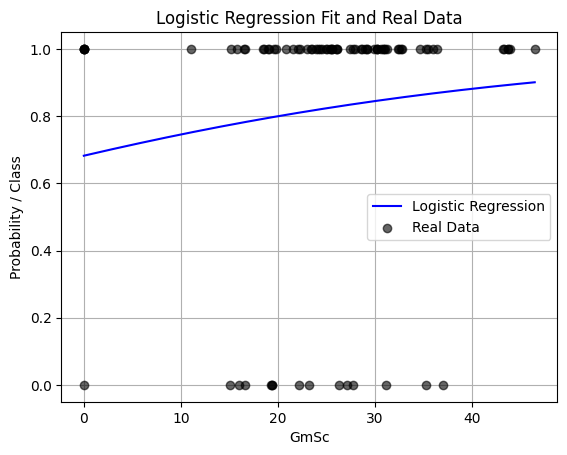

In [36]:
# Generate smooth curve data
x_vals = np.linspace(x.min(), x.max(), 300).reshape(-1, 1)
# x_vals = np.linspace(-100, 100, 3000).reshape(-1, 1)
# Predict probabilities for the logistic curve
y_probs = model.predict_proba(x_vals)[:, 1]  # probability of class 1

# Plot the logistic regression curve
plt.plot(x_vals, y_probs, color='blue', label='Logistic Regression')

# Plot the real data points (scatter)
# Use y values as dots at 0 or 1, jitter slightly to see overlap
plt.scatter(x, y, color='black', zorder=20, label='Real Data', alpha=0.6)

plt.xlabel('GmSc')      # change to your feature name
plt.ylabel('Probability / Class')
plt.title('Logistic Regression Fit and Real Data')
plt.legend()
plt.grid(True)
plt.show()

In [37]:
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [[0.03100442]]
Intercept: [0.76367206]


In [38]:
r, p = pointbiserialr(df['Result'], df['GmSc'].fillna(0))
print("r_pb:", r)
print("p-value:", p)

r_pb: 0.1265381590195389
p-value: 0.2543182513420755
